<img src = 'const.png'>

In [42]:
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

C1 = 0.7878062 #[m3/s]
C2 = 0.1757208 #[m3/s]
V_vest = 8 #[m3]
V_1 = 0.000147781 #[m3]
V_2 = 2.65143e-5 #[m3]
p_vest = 2e-5*133.322
base_pressure = 8e-7*133.322 #1torr = 133.322Pa
print(p_vest, base_pressure)
df = pd.read_csv('#P_24932-24934.csv')
time = df['24934 : Pressure']
time = np.array(time[1:],dtype='float64')
Q_value1 = df['24932 : Pressure.1']
Q_value2 = df['24933 : Pressure.1']
Q_value3 = df['24934 : Pressure.1']

Q_value1 = np.array(Q_value1[1:],dtype='float64')
Q_value2 = np.array(Q_value2[1:],dtype='float64')
Q_value3 = np.array(Q_value3[1:],dtype='float64')

def function(x, t, C1, C2):
    p1 = x[0]
    p2 = x[1]
    dp1dt = (C1*(p_vest-p1)-C2*(p1-p2))/V_1
    dp2dt = C2*(p1-p2)/V_2
    
    return dp1dt, dp2dt

0.0026664400000000004 0.0001066576


<img src = 'pressure.png'>

In [43]:
def calculation(C1,C2):
    init = np.full((2,), base_pressure)
    t = np.linspace(0, 0.02, 1000)
    res = odeint(function, init, t, args=(C1,C2))
    p1 = res[:,0]
    p2 = res[:,1]
    
    return t,p1,p2

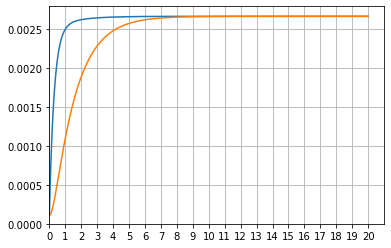

In [68]:
t = calculation(0.47,0.02)[0]
p1 = calculation(0.47,0.02)[1]
p2 = calculation(0.47,0.02)[2]
plt.plot(t*1000,p1,t*1000,p2)
plt.xticks(np.arange(0,21,1))
plt.grid(1)
plt.xlim(0,)
plt.ylim(0,)
plt.show()
df = pd.DataFrame({'time':t*1000,'p1':p1,'p2':p2})
df.to_excel('C1_0.47_C2_0.02_data.xlsx')

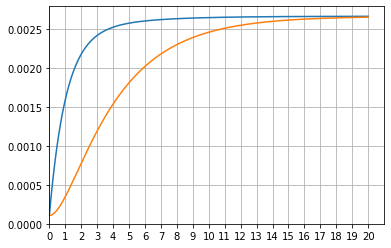

In [70]:
t = calculation(0.133,0.0083)[0]
p1 = calculation(0.133,0.0083)[1]
p2 = calculation(0.133,0.0083)[2]
plt.plot(t*1000,p1,t*1000,p2)
plt.xticks(np.arange(0,21,1))
plt.grid(1)
plt.xlim(0,)
plt.ylim(0,)
plt.show()


df = pd.DataFrame({'time':t*1000,'p1':p1,'p2':p2})
df.to_excel('C1_0.133_C2_0.0083_data.xlsx')

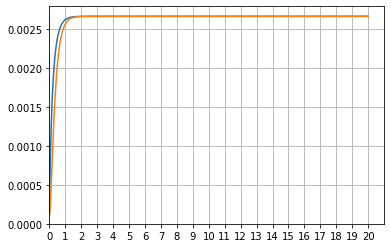

In [71]:
t = calculation(0.7878062,0.17572)[0]
p1 = calculation(0.7878062,0.17572)[1]
p2 = calculation(0.7878062,0.17572)[2]
plt.plot(t*1000,p1,t*1000,p2)
plt.xticks(np.arange(0,21,1))
plt.grid(1)
plt.xlim(0,)
plt.ylim(0,)
plt.show()
df = pd.DataFrame({'time':t*1000,'p1':p1,'p2':p2})
df.to_excel('C1_0.7878_C2_0.17572_data.xlsx')